# Objective: show distribution expression in dataset

## Import base packages

In [1]:
import pandas as pd
import numpy as np

## Getting dataset

In [2]:
df = pd.read_csv('../../datasets/fer2013.csv')
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


## Groupy dataset by *emotion*

In [3]:
df_emotion = df.groupby('emotion')
df_emotion.describe()

Usage                        pixels         \
        count unique       top  freq  count unique   
emotion                                              
0        4953      3  Training  3995   4953   4740   
1         547      3  Training   436    547    461   
2        5121      3  Training  4097   5121   4835   
3        8989      3  Training  7215   8989   8800   
4        6077      3  Training  4830   6077   5934   
5        4002      3  Training  3171   4002   3267   
6        6198      3  Training  4965   6198   6057   

                                                                 
                                                       top freq  
emotion                                                          
0        0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...    8  
1        255 251 97 82 75 51 52 86 125 160 182 192 198 ...    6  
2        6 25 36 36 95 142 147 166 176 178 174 172 169 ...    7  
3        183 183 183 182 185 170 144 143 142 143 143 14...    3  
4        53 62 105 133 155 171 177 181 186 187 186 188 ...    4  
5        243 222 205 203 200 192 207 188 193 194 202 20...    5  
6        69 87 108 108 74 78 58 36 36 39 34 45 85 118 1...    4

## Create dictionary index to expression

In [4]:
expression = {
    0 : 'Raiva',
    1 : 'Nojo',
    2 : 'Medo',
    3 : 'Felicidade',
    4 : 'Tristeza',
    5 : 'Surpresa',
    6 : 'Neutro'
}

## Get amount data per *emotion*

In [5]:
expression_size = {}
for label, group in df_emotion.groups.items():    
    expression_size[expression[label]] = group.size
expression_size

{'Felicidade': 8989,
 'Medo': 5121,
 'Neutro': 6198,
 'Nojo': 547,
 'Raiva': 4953,
 'Surpresa': 4002,
 'Tristeza': 6077}

## Sort dict

## Plot bar graph

### Import graph package

In [6]:
import seaborn as sns
sns.set_style("whitegrid")

### Create axis data from *expression_size*

In [7]:
x, y = [], []
for label, size in expression_size.items():
    x.append(label)
    y.append(size)
x, y

(['Raiva', 'Nojo', 'Medo', 'Felicidade', 'Tristeza', 'Surpresa', 'Neutro'],
 [4953, 547, 5121, 8989, 6077, 4002, 6198])

### Calculate percentage of expression in dataset

In [8]:
total = np.sum(y)

percentage = {}
for expression, size in expression_size.items():
    percentage[expression] = size / total
percentage

{'Felicidade': 0.25048067545350683,
 'Medo': 0.14269791289324826,
 'Neutro': 0.17270878033828405,
 'Nojo': 0.01524228829381113,
 'Raiva': 0.13801655195474685,
 'Surpresa': 0.11151670521358709,
 'Tristeza': 0.1693370858528158}

### Get Green palette

Get gradient values of green from palette, than order this palette according to *amount* of sample per expression. High value of samples get dark green, low value of samples get light green.

In [9]:
pal = sns.color_palette("Greens_d", len(x))
rank = np.array(y).argsort().argsort()
pal = np.array(pal[::-1])[rank]

### Plot graph

[Text(0,0.5,'Samples'), Text(0.5,0,'Expression')]

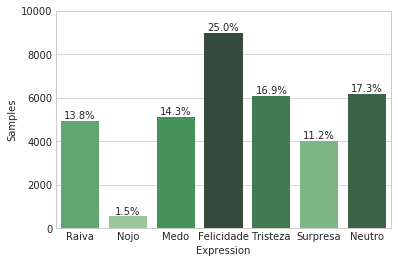

In [10]:
ax = sns.barplot(x, y, palette=pal)
ax.set(ylim=(0, 10000))
for p, percent in zip(ax.patches, percentage.values()):
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 100, f'{percent*100:.1f}%', ha='center')
ax.set(xlabel='Expression', ylabel='Samples')

## Save graph

In [11]:
figure = ax.get_figure()
figure.savefig('../../overleaf/images/expression_distribution.png', dpi=400)